In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [8]:
df.value_counts('Type')

Type
2    76
1    70
7    29
3    17
5    13
6     9
dtype: int64

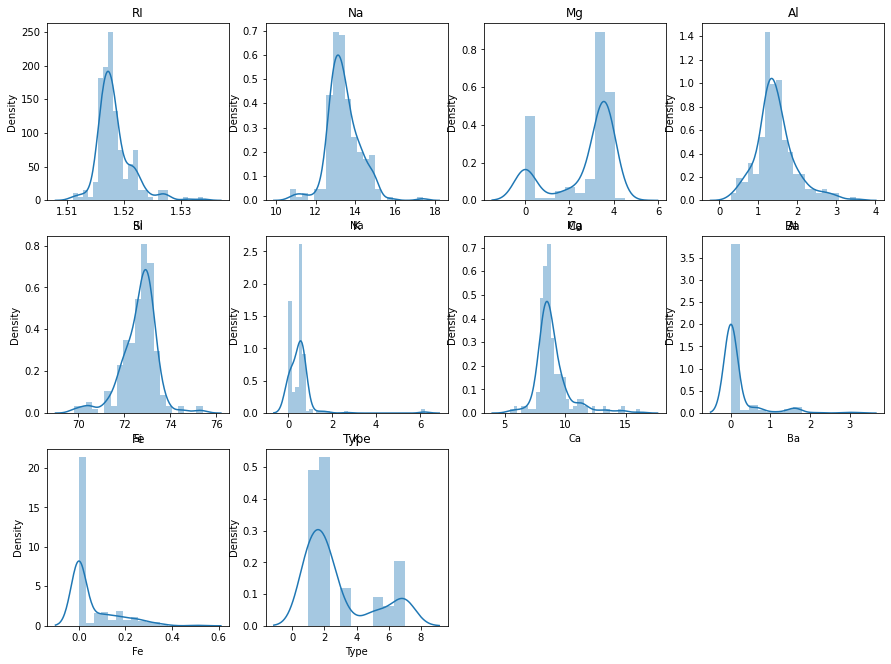

In [9]:
#Check Skweness
i = 1
plt.figure(figsize=(15,15))
for x in df.columns:
  plt.subplot(4,4,i)
  plt.title(x)
  sns.distplot(df[x])
  i+=1

In [10]:
x = df.drop('Type',axis=1)
y = df.Type

In [11]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

Label Encoding y

In [13]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [14]:
y = y.map({1:0,2:1,3:2,5:3,6:4,7:5})

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

Neural Network

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [18]:
model = Sequential()
model.add(Dense(units=45, activation="relu", input_dim=9))
model.add(Dense(units=30, activation="relu"))
model.add(Dense(units=25, activation="relu"))
model.add(Dense(units=22, activation="relu"))
model.add(Dense(units=18, activation="relu"))
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=6, activation="softmax"))


In [19]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")



In [20]:
model.fit(xtrain, ytrain, epochs=300)

Epoch 1/300
6/6 [==============================] - 1s 3ms/step - loss: 1.7857
Epoch 2/300
6/6 [==============================] - 0s 3ms/step - loss: 1.7709
Epoch 3/300
6/6 [==============================] - 0s 4ms/step - loss: 1.7551
Epoch 4/300
6/6 [==============================] - 0s 3ms/step - loss: 1.7295
Epoch 5/300
6/6 [==============================] - 0s 3ms/step - loss: 1.7021
Epoch 6/300
6/6 [==============================] - 0s 3ms/step - loss: 1.6670
Epoch 7/300
6/6 [==============================] - 0s 3ms/step - loss: 1.6344
Epoch 8/300
6/6 [==============================] - 0s 3ms/step - loss: 1.6007
Epoch 9/300
6/6 [==============================] - 0s 3ms/step - loss: 1.5745
Epoch 10/300
6/6 [==============================] - 0s 3ms/step - loss: 1.5505
Epoch 11/300
6/6 [==============================] - 0s 3ms/step - loss: 1.5275
Epoch 12/300
6/6 [==============================] - 0s 4ms/step - loss: 1.5084
Epoch 13/300
6/6 [==============================] - 0s 3ms/st

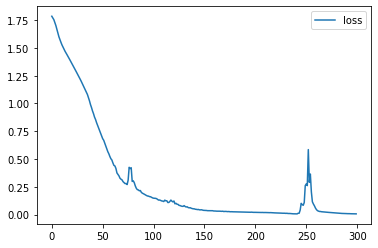

In [21]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [22]:
y_pred = model.predict(xtest)

In [23]:
y_pred = y_pred.argmax(axis=1)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.79      0.73      0.76        15
           2       1.00      0.33      0.50         3
           3       0.67      0.67      0.67         3
           4       1.00      1.00      1.00         2
           5       0.86      1.00      0.92         6

    accuracy                           0.77        43
   macro avg       0.83      0.75      0.76        43
weighted avg       0.78      0.77      0.76        43



In [25]:
from tensorflow.keras.models import load_model
model.save("glass.")

INFO:tensorflow:Assets written to: glass./assets
